In [1]:
import numpy as np
import pandas as pd
import polars as pl
import os
import gc
import json
import random
from tqdm import tqdm
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import zarr

gc.enable()

pd.options.display.max_columns = None
#pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_colwidth', None)

#pl.Config.set_tbl_rows(-1)
pl.Config.set_tbl_cols(-1)
pl.Config.set_fmt_str_lengths(10000)

polars.config.Config

In [2]:
path = 'I:/Kaggle/czii-cryo-et-object-identification/'

In [3]:
train_data_experiment_folders_path = path + 'train/static/ExperimentRuns/'
train_data_experiment_folders_path

'I:/Kaggle/czii-cryo-et-object-identification/train/static/ExperimentRuns/'

In [43]:
test_data_experiment_folders_path = path + 'test/static/ExperimentRuns/'
test_data_experiment_folders_path

'I:/Kaggle/czii-cryo-et-object-identification/test/static/ExperimentRuns/'

In [4]:
train_data_experiments = os.listdir(train_data_experiment_folders_path)
train_data_experiments

['TS_5_4', 'TS_69_2', 'TS_6_4', 'TS_6_6', 'TS_73_6', 'TS_86_3', 'TS_99_9']

In [44]:
test_data_experiments = os.listdir(test_data_experiment_folders_path)
test_data_experiments

['TS_5_4', 'TS_69_2', 'TS_6_4']

In [5]:
data_dict = {}
for experiment in tqdm(train_data_experiments):
    image_types_dict = {}    
    image_types_dict['denoised'] = zarr.open(train_data_experiment_folders_path + f'{experiment}/VoxelSpacing10.000/denoised.zarr', mode='r')
    image_types_dict['iso'] = zarr.open(train_data_experiment_folders_path + f'{experiment}/VoxelSpacing10.000/isonetcorrected.zarr', mode='r')
    image_types_dict['dcon'] = zarr.open(train_data_experiment_folders_path + f'{experiment}/VoxelSpacing10.000/ctfdeconvolved.zarr', mode='r')
    image_types_dict['wbp'] = zarr.open(train_data_experiment_folders_path + f'{experiment}/VoxelSpacing10.000/wbp.zarr', mode='r')
    data_dict[experiment] = image_types_dict

100%|███████████████████████████████████████████████████████████████████████████████████| 7/7 [00:00<00:00, 148.53it/s]


In [6]:
data_dict

{'TS_5_4': {'denoised': <Group file://I:/Kaggle/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_5_4/VoxelSpacing10.000/denoised.zarr>,
  'iso': <Group file://I:/Kaggle/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_5_4/VoxelSpacing10.000/isonetcorrected.zarr>,
  'dcon': <Group file://I:/Kaggle/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_5_4/VoxelSpacing10.000/ctfdeconvolved.zarr>,
  'wbp': <Group file://I:/Kaggle/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_5_4/VoxelSpacing10.000/wbp.zarr>},
 'TS_69_2': {'denoised': <Group file://I:/Kaggle/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_69_2/VoxelSpacing10.000/denoised.zarr>,
  'iso': <Group file://I:/Kaggle/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_69_2/VoxelSpacing10.000/isonetcorrected.zarr>,
  'dcon': <Group file://I:/Kaggle/czii-cryo-et-object-identification/train/static/ExperimentRuns/TS_69_2/VoxelSpacing10.00

In [46]:
test_data_dict = {}
for experiment in tqdm(test_data_experiments):
    image_types_dict = {}    
    image_types_dict['denoised'] = zarr.open(test_data_experiment_folders_path + f'{experiment}/VoxelSpacing10.000/denoised.zarr', mode='r')
    test_data_dict[experiment] = image_types_dict

100%|███████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00, 490.39it/s]


In [47]:
test_data_dict

{'TS_5_4': {'denoised': <Group file://I:/Kaggle/czii-cryo-et-object-identification/test/static/ExperimentRuns/TS_5_4/VoxelSpacing10.000/denoised.zarr>},
 'TS_69_2': {'denoised': <Group file://I:/Kaggle/czii-cryo-et-object-identification/test/static/ExperimentRuns/TS_69_2/VoxelSpacing10.000/denoised.zarr>},
 'TS_6_4': {'denoised': <Group file://I:/Kaggle/czii-cryo-et-object-identification/test/static/ExperimentRuns/TS_6_4/VoxelSpacing10.000/denoised.zarr>}}

In [49]:
for experiment in tqdm(test_data_experiments):
    print(os.listdir(test_data_experiment_folders_path + f'{experiment}/VoxelSpacing10.000/'))

100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]

['denoised.zarr']
['denoised.zarr']
['denoised.zarr']


In [30]:
data_dict.keys()

dict_keys(['TS_5_4', 'TS_69_2', 'TS_6_4', 'TS_6_6', 'TS_73_6', 'TS_86_3', 'TS_99_9'])

In [37]:
for key in data_dict.keys():
    print(key)
    for image_type in data_dict[key].keys():
        print(data_dict[key][image_type]['0'].shape)

TS_5_4
(184, 630, 630)
(184, 630, 630)
(184, 630, 630)
(184, 630, 630)
TS_69_2
(184, 630, 630)
(184, 630, 630)
(184, 630, 630)
(184, 630, 630)
TS_6_4
(184, 630, 630)
(184, 630, 630)
(184, 630, 630)
(184, 630, 630)
TS_6_6
(184, 630, 630)
(184, 630, 630)
(184, 630, 630)
(184, 630, 630)
TS_73_6
(184, 630, 630)
(184, 630, 630)
(184, 630, 630)
(184, 630, 630)
TS_86_3
(184, 630, 630)
(184, 630, 630)
(184, 630, 630)
(184, 630, 630)
TS_99_9
(184, 630, 630)
(184, 630, 630)
(184, 630, 630)
(184, 630, 630)


In [38]:
for key in data_dict.keys():
    print(key)
    for image_type in data_dict[key].keys():
        print(data_dict[key][image_type]['1'].shape)

TS_5_4
(92, 315, 315)
(92, 315, 315)
(92, 315, 315)
(92, 315, 315)
TS_69_2
(92, 315, 315)
(92, 315, 315)
(92, 315, 315)
(92, 315, 315)
TS_6_4
(92, 315, 315)
(92, 315, 315)
(92, 315, 315)
(92, 315, 315)
TS_6_6
(92, 315, 315)
(92, 315, 315)
(92, 315, 315)
(92, 315, 315)
TS_73_6
(92, 315, 315)
(92, 315, 315)
(92, 315, 315)
(92, 315, 315)
TS_86_3
(92, 315, 315)
(92, 315, 315)
(92, 315, 315)
(92, 315, 315)
TS_99_9
(92, 315, 315)
(92, 315, 315)
(92, 315, 315)
(92, 315, 315)


In [39]:
for key in data_dict.keys():
    print(key)
    for image_type in data_dict[key].keys():
        print(data_dict[key][image_type]['2'].shape)

TS_5_4
(46, 158, 158)
(46, 158, 158)
(46, 158, 158)
(46, 158, 158)
TS_69_2
(46, 158, 158)
(46, 158, 158)
(46, 158, 158)
(46, 158, 158)
TS_6_4
(46, 158, 158)
(46, 158, 158)
(46, 158, 158)
(46, 158, 158)
TS_6_6
(46, 158, 158)
(46, 158, 158)
(46, 158, 158)
(46, 158, 158)
TS_73_6
(46, 158, 158)
(46, 158, 158)
(46, 158, 158)
(46, 158, 158)
TS_86_3
(46, 158, 158)
(46, 158, 158)
(46, 158, 158)
(46, 158, 158)
TS_99_9
(46, 158, 158)
(46, 158, 158)
(46, 158, 158)
(46, 158, 158)


TS_5_4


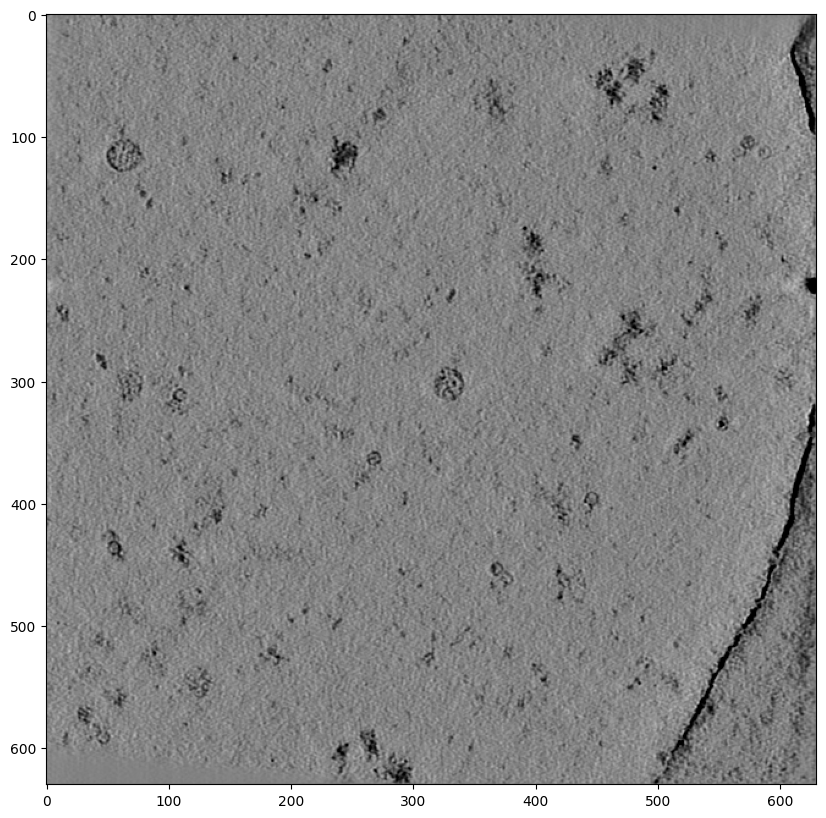

TS_69_2


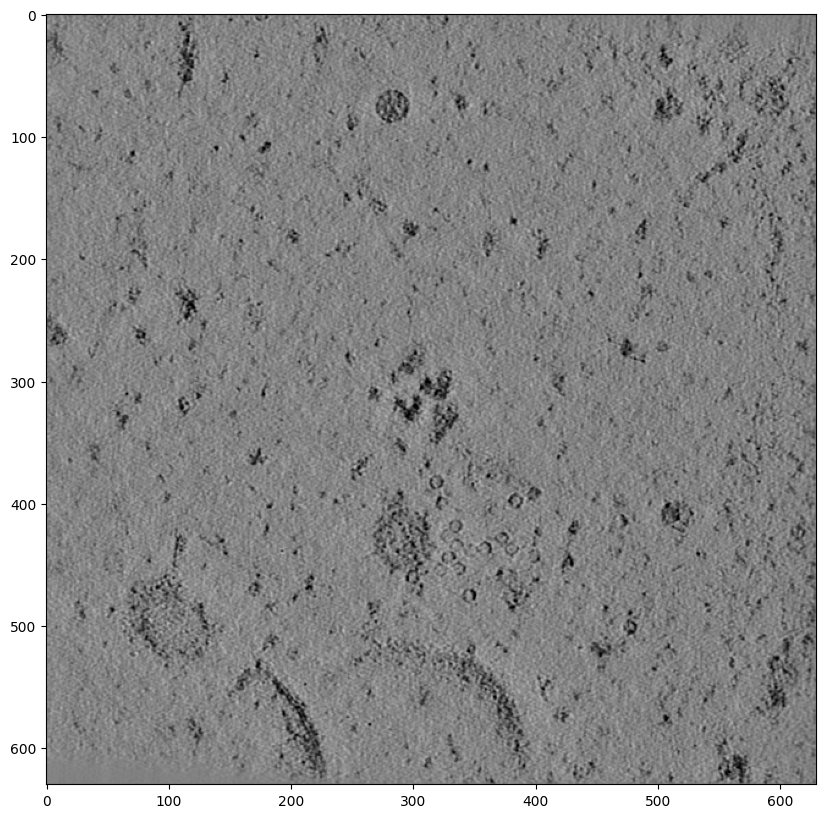

TS_6_4


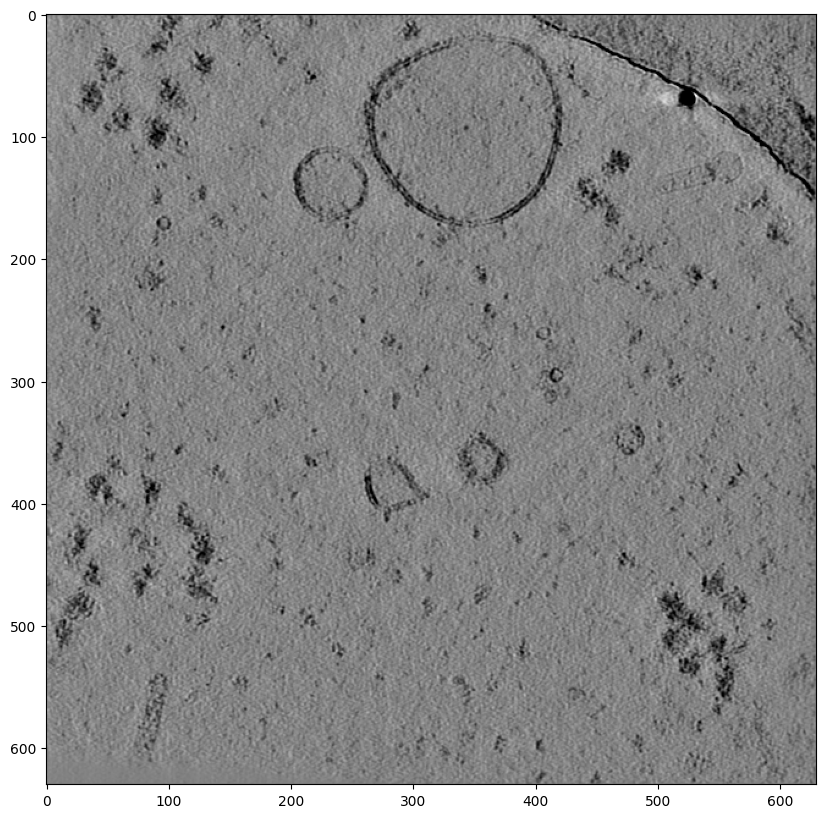

TS_6_6


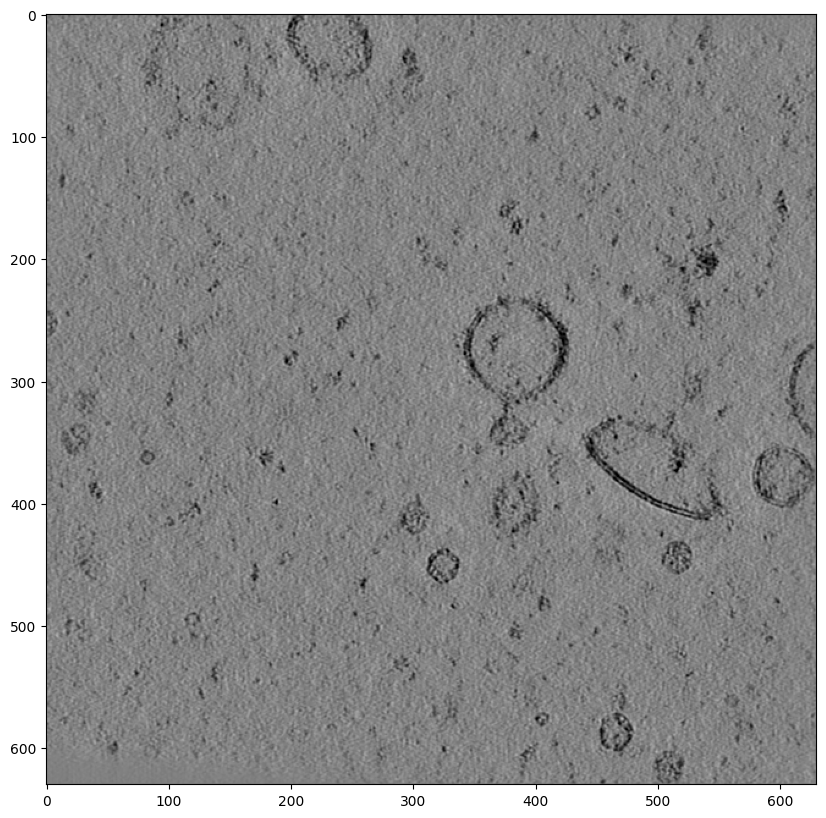

TS_73_6


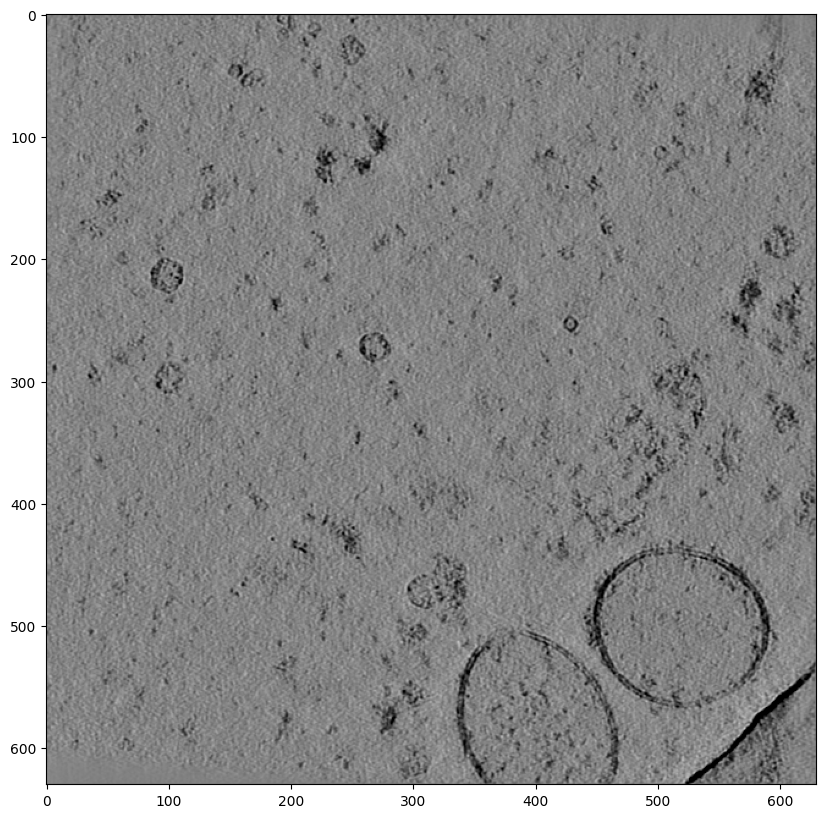

TS_86_3


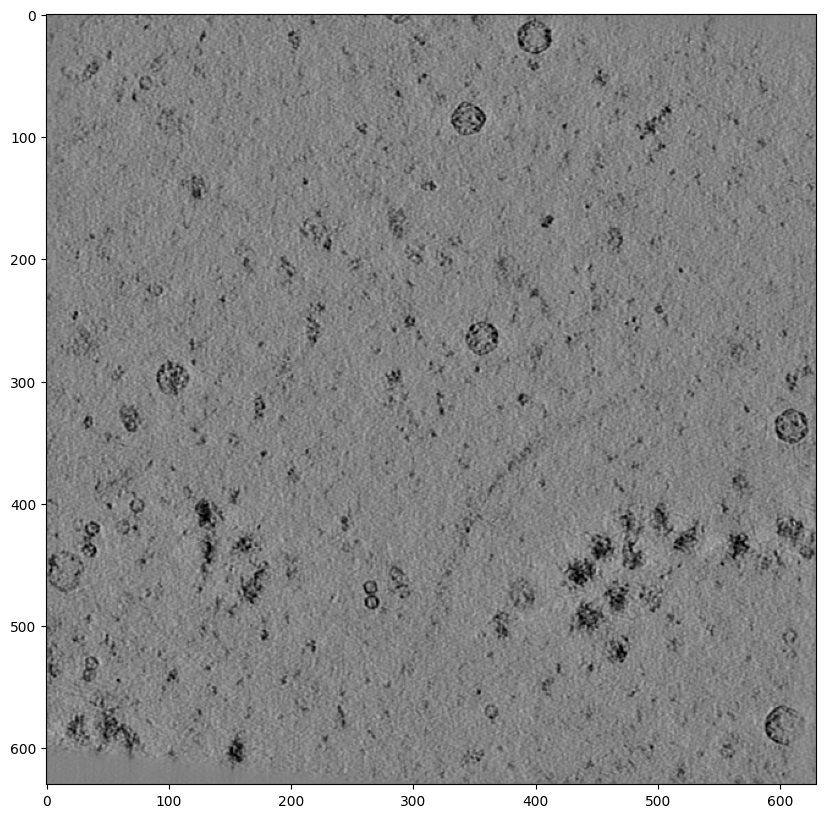

TS_99_9


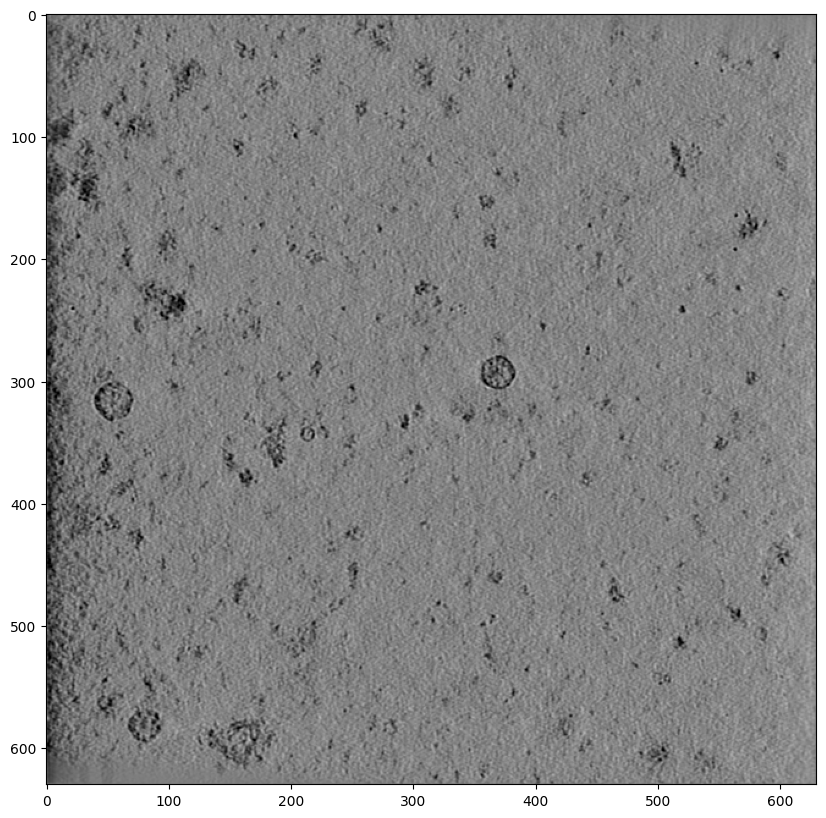

In [42]:
for key in data_dict.keys():
    print(key)
    first_image = data_dict[key]['denoised']['0'][62]

    plt.figure(figsize=(10, 10))
    plt.imshow(first_image, cmap='grey', vmin=-0.00005, vmax=0.00005)
    plt.show()    

In [7]:
train_label_experiment_folders_path = path + 'train/overlay/ExperimentRuns/'
train_label_experiment_folders_path

'I:/Kaggle/czii-cryo-et-object-identification/train/overlay/ExperimentRuns/'

In [8]:
train_label_experiments = os.listdir(train_label_experiment_folders_path)
train_label_experiments

['TS_5_4', 'TS_69_2', 'TS_6_4', 'TS_6_6', 'TS_73_6', 'TS_86_3', 'TS_99_9']

In [10]:
with open(f'{train_label_experiment_folders_path}{train_label_experiments[0]}/Picks/ribosome.json') as f:
    prac_json = json.loads(f.read())

In [11]:
prac_json

{'pickable_object_name': 'ribosome',
 'user_id': 'curation',
 'session_id': '0',
 'run_name': 'TS_5_4',
 'voxel_spacing': None,
 'unit': 'angstrom',
 'points': [{'location': {'x': 4601.271, 'y': 601.066, 'z': 600.934},
   'transformation_': [[1.0, 0.0, 0.0, 0.0],
    [0.0, 1.0, 0.0, 0.0],
    [0.0, 0.0, 1.0, 0.0],
    [0.0, 0.0, 0.0, 1.0]],
   'instance_id': 0},
  {'location': {'x': 4803.789, 'y': 455.425, 'z': 514.016},
   'transformation_': [[1.0, 0.0, 0.0, 0.0],
    [0.0, 1.0, 0.0, 0.0],
    [0.0, 0.0, 1.0, 0.0],
    [0.0, 0.0, 0.0, 1.0]],
   'instance_id': 0},
  {'location': {'x': 4715.436, 'y': 825.374, 'z': 802.166},
   'transformation_': [[1.0, 0.0, 0.0, 0.0],
    [0.0, 1.0, 0.0, 0.0],
    [0.0, 0.0, 1.0, 0.0],
    [0.0, 0.0, 0.0, 1.0]],
   'instance_id': 0},
  {'location': {'x': 5003.275, 'y': 782.745, 'z': 802.48},
   'transformation_': [[1.0, 0.0, 0.0, 0.0],
    [0.0, 1.0, 0.0, 0.0],
    [0.0, 0.0, 1.0, 0.0],
    [0.0, 0.0, 0.0, 1.0]],
   'instance_id': 0},
  {'location': {'x

In [27]:
len(prac_json['points'])

31

In [23]:
for i in range(len(prac_json['points'])):
    print(prac_json['points'][i])

{'location': {'x': 4601.271, 'y': 601.066, 'z': 600.934}, 'transformation_': [[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0]], 'instance_id': 0}
{'location': {'x': 4803.789, 'y': 455.425, 'z': 514.016}, 'transformation_': [[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0]], 'instance_id': 0}
{'location': {'x': 4715.436, 'y': 825.374, 'z': 802.166}, 'transformation_': [[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0]], 'instance_id': 0}
{'location': {'x': 5003.275, 'y': 782.745, 'z': 802.48}, 'transformation_': [[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0]], 'instance_id': 0}
{'location': {'x': 710.459, 'y': 3815.845, 'z': 1405.435}, 'transformation_': [[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0]], 'instance_id': 0}
{'location': {'x': 2421.852, 'y': 1141.637, 'z': 663.19}, 'transformation_'

In [24]:
with open(f'{train_label_experiment_folders_path}{train_label_experiments[1]}/Picks/ribosome.json') as f:
    prac_json2 = json.loads(f.read())

In [26]:
len(prac_json2['points'])

37

In [28]:
for i in range(len(prac_json2['points'])):
    print(prac_json2['points'][i])

{'location': {'x': 6006.82, 'y': 5328.856, 'z': 808.633}, 'transformation_': [[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0]], 'instance_id': 0}
{'location': {'x': 5957.767, 'y': 5571.663, 'z': 706.068}, 'transformation_': [[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0]], 'instance_id': 0}
{'location': {'x': 5618.836, 'y': 6161.76, 'z': 693.695}, 'transformation_': [[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0]], 'instance_id': 0}
{'location': {'x': 1127.794, 'y': 187.938, 'z': 537.361}, 'transformation_': [[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0]], 'instance_id': 0}
{'location': {'x': 1767.82, 'y': 3213.929, 'z': 1001.62}, 'transformation_': [[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0]], 'instance_id': 0}
{'location': {'x': 1916.347, 'y': 3426.268, 'z': 1005.688}, 'transformatio

In [51]:
for experiment in train_label_experiments:
    print(experiment)
    print(os.listdir(train_label_experiment_folders_path + f'{experiment}/Picks/'))

TS_5_4
['apo-ferritin.json', 'beta-amylase.json', 'beta-galactosidase.json', 'ribosome.json', 'thyroglobulin.json', 'virus-like-particle.json']
TS_69_2
['apo-ferritin.json', 'beta-amylase.json', 'beta-galactosidase.json', 'ribosome.json', 'thyroglobulin.json', 'virus-like-particle.json']
TS_6_4
['apo-ferritin.json', 'beta-amylase.json', 'beta-galactosidase.json', 'ribosome.json', 'thyroglobulin.json', 'virus-like-particle.json']
TS_6_6
['apo-ferritin.json', 'beta-amylase.json', 'beta-galactosidase.json', 'ribosome.json', 'thyroglobulin.json', 'virus-like-particle.json']
TS_73_6
['apo-ferritin.json', 'beta-amylase.json', 'beta-galactosidase.json', 'ribosome.json', 'thyroglobulin.json', 'virus-like-particle.json']
TS_86_3
['apo-ferritin.json', 'beta-amylase.json', 'beta-galactosidase.json', 'ribosome.json', 'thyroglobulin.json', 'virus-like-particle.json']
TS_99_9
['apo-ferritin.json', 'beta-amylase.json', 'beta-galactosidase.json', 'ribosome.json', 'thyroglobulin.json', 'virus-like-part

In [52]:
labels_dict = {}
for experiment in tqdm(train_label_experiments):
    particle_types_dict = {}
    
    with open(f'{train_label_experiment_folders_path}{experiment}/Picks/apo-ferritin.json') as f:
        loaded_json = json.loads(f.read())
    particle_types_dict['apo-ferritin'] = loaded_json

    with open(f'{train_label_experiment_folders_path}{experiment}/Picks/beta-amylase.json') as f:
        loaded_json = json.loads(f.read())
    particle_types_dict['beta-amylase'] = loaded_json

    with open(f'{train_label_experiment_folders_path}{experiment}/Picks/beta-galactosidase.json') as f:
        loaded_json = json.loads(f.read())
    particle_types_dict['beta-galactosidase'] = loaded_json

    with open(f'{train_label_experiment_folders_path}{experiment}/Picks/ribosome.json') as f:
        loaded_json = json.loads(f.read())
    particle_types_dict['ribosome'] = loaded_json

    with open(f'{train_label_experiment_folders_path}{experiment}/Picks/thyroglobulin.json') as f:
        loaded_json = json.loads(f.read())
    particle_types_dict['thyroglobulin'] = loaded_json

    with open(f'{train_label_experiment_folders_path}{experiment}/Picks/virus-like-particle.json') as f:
        loaded_json = json.loads(f.read())
    particle_types_dict['virus-like-particle'] = loaded_json

    labels_dict[experiment] = particle_types_dict

100%|████████████████████████████████████████████████████████████████████████████████████| 7/7 [00:01<00:00,  5.65it/s]


In [53]:
labels_dict

{'TS_5_4': {'apo-ferritin': {'pickable_object_name': 'apo-ferritin',
   'user_id': 'curation',
   'session_id': '0',
   'run_name': 'TS_5_4',
   'voxel_spacing': None,
   'unit': 'angstrom',
   'points': [{'location': {'x': 468.514, 'y': 5915.906, 'z': 604.167},
     'transformation_': [[1.0, 0.0, 0.0, 0.0],
      [0.0, 1.0, 0.0, 0.0],
      [0.0, 0.0, 1.0, 0.0],
      [0.0, 0.0, 0.0, 1.0]],
     'instance_id': 0},
    {'location': {'x': 5674.694, 'y': 1114.354, 'z': 565.068},
     'transformation_': [[1.0, 0.0, 0.0, 0.0],
      [0.0, 1.0, 0.0, 0.0],
      [0.0, 0.0, 1.0, 0.0],
      [0.0, 0.0, 0.0, 1.0]],
     'instance_id': 0},
    {'location': {'x': 5744.509, 'y': 1049.172, 'z': 653.712},
     'transformation_': [[1.0, 0.0, 0.0, 0.0],
      [0.0, 1.0, 0.0, 0.0],
      [0.0, 0.0, 1.0, 0.0],
      [0.0, 0.0, 0.0, 1.0]],
     'instance_id': 0},
    {'location': {'x': 5880.769, 'y': 1125.348, 'z': 579.56},
     'transformation_': [[1.0, 0.0, 0.0, 0.0],
      [0.0, 1.0, 0.0, 0.0],
      

In [55]:
for experiment in test_data_experiments:
    print(experiment)
    print(labels_dict[experiment])

TS_5_4
{'apo-ferritin': {'pickable_object_name': 'apo-ferritin', 'user_id': 'curation', 'session_id': '0', 'run_name': 'TS_5_4', 'voxel_spacing': None, 'unit': 'angstrom', 'points': [{'location': {'x': 468.514, 'y': 5915.906, 'z': 604.167}, 'transformation_': [[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0]], 'instance_id': 0}, {'location': {'x': 5674.694, 'y': 1114.354, 'z': 565.068}, 'transformation_': [[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0]], 'instance_id': 0}, {'location': {'x': 5744.509, 'y': 1049.172, 'z': 653.712}, 'transformation_': [[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0]], 'instance_id': 0}, {'location': {'x': 5880.769, 'y': 1125.348, 'z': 579.56}, 'transformation_': [[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0]], 'instance_id': 0}, {'location': {'x': 4661.667, 'y': 1269.497, 'z': 810.409}, 'transformat

In [70]:
experiment_list = []
particle_type_list = []
x_list = []
y_list = []
z_list = []
for experiment in tqdm(test_data_experiments):
    #print(experiment)
    #print(len(labels_dict[experiment]['apo-ferritin']['points']))
    #print(type(labels_dict[experiment]['apo-ferritin']['points']))
    #print(labels_dict[experiment]['apo-ferritin']['points'][0])

    for key in labels_dict[experiment].keys():
        #print(labels_dict[experiment][key])
        #print(labels_dict[experiment][key]['pickable_object_name'])
        for i in range(len(labels_dict[experiment][key]['points'])):
            experiment_list.append(labels_dict[experiment][key]['run_name'])
            particle_type_list.append(labels_dict[experiment][key]['pickable_object_name'])
            x_list.append(labels_dict[experiment][key]['points'][i]['location']['x'])
            y_list.append(labels_dict[experiment][key]['points'][i]['location']['y'])
            z_list.append(labels_dict[experiment][key]['points'][i]['location']['z'])

100%|████████████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:00<?, ?it/s]


In [72]:
print(len(experiment_list))
print(len(particle_type_list))

476
476


In [73]:
data_dict.keys()

dict_keys(['TS_5_4', 'TS_69_2', 'TS_6_4', 'TS_6_6', 'TS_73_6', 'TS_86_3', 'TS_99_9'])

In [79]:
data_dict[list(data_dict.keys())[0]]['denoised']['0'][62].shape

(630, 630)

In [84]:
np.max(data_dict[list(data_dict.keys())[0]]['denoised']['0'])

0.00015229516

In [85]:
np.min(data_dict[list(data_dict.keys())[0]]['denoised']['0'])

-0.00032409787

In [86]:
for key in data_dict.keys():
    print(key)
    print('max:', np.max(data_dict[key]['denoised']['0']))
    print('min:', np.min(data_dict[key]['denoised']['0']))

TS_5_4
max: 0.00015229516
min: -0.00032409787
TS_69_2
max: 4.315953e-05
min: -0.00012605284
TS_6_4
max: 0.000120038996
min: -0.00056041696
TS_6_6
max: 3.9121896e-05
min: -0.0001354571
TS_73_6
max: 4.140895e-05
min: -0.00014173839
TS_86_3
max: 3.787999e-05
min: -9.533731e-05
TS_99_9
max: 3.823886e-05
min: -0.00010355503


In [92]:
data_dict[list(data_dict.keys())[0]]['denoised']['0'][0][0][0]

-1.0589503e-08

In [111]:
prac_data = data_dict[list(data_dict.keys())[2]]['denoised']['0']
prac_data.shape

(184, 630, 630)

In [112]:
np.min(prac_data)

-0.00056041696

In [113]:
np.max(prac_data)

0.000120038996

In [114]:
prac_data = prac_data - np.min(prac_data)
prac_data = prac_data / np.max(prac_data)

In [115]:
np.min(prac_data)

0.0

In [116]:
np.max(prac_data)

1.0

# References

1. https://www.kaggle.com/code/davidlist/experiment-ts-6-4-visualization
2. https://www.kaggle.com/code/nk35jk/3d-visualization-of-particles